# Homework 6

## Due Tuesday April 6th 2021 at 11:59pm

For each problem state:

the null and alternative hypotheses, whether the test is a one-tail or two-tailed test, conduct the appropriate test and the tests assumptions, state and support your conclusions.  Assume the outcome variable is ~N(μ,σ2) and α = .05.

Also evaluate the data based on the material reviewed in class, does the data seem to follow a normal distribution? are there outliers that could affect the data? if there are multiple samples do they have equal variance, does the data need to be transformed?

Not everything needs to be applied to every dataset, however, you must judge what are the most relevant plots or analysis to draw conclusions from the data based on the hypothesis.

### A.

A random sample of 30 employes from a large financial organization has been selected to evaluate their learning performance after a series of seminars. Each subject was given a test that has a national average score of 50. Has the seminar programs statistically improved the scores of the employes?

These are the scores:

02 54 69 47 66 44 56 55 67 47 58 39 42 45 72 72 69 75 57 54 34 62 50 58 48 63
74 45 71 59

At a mean of 55.1 the z-score of the new employee scores is 0.340 while the critical value is 1.645 so
the increase is not significant and we cannot reject the null hypothesis

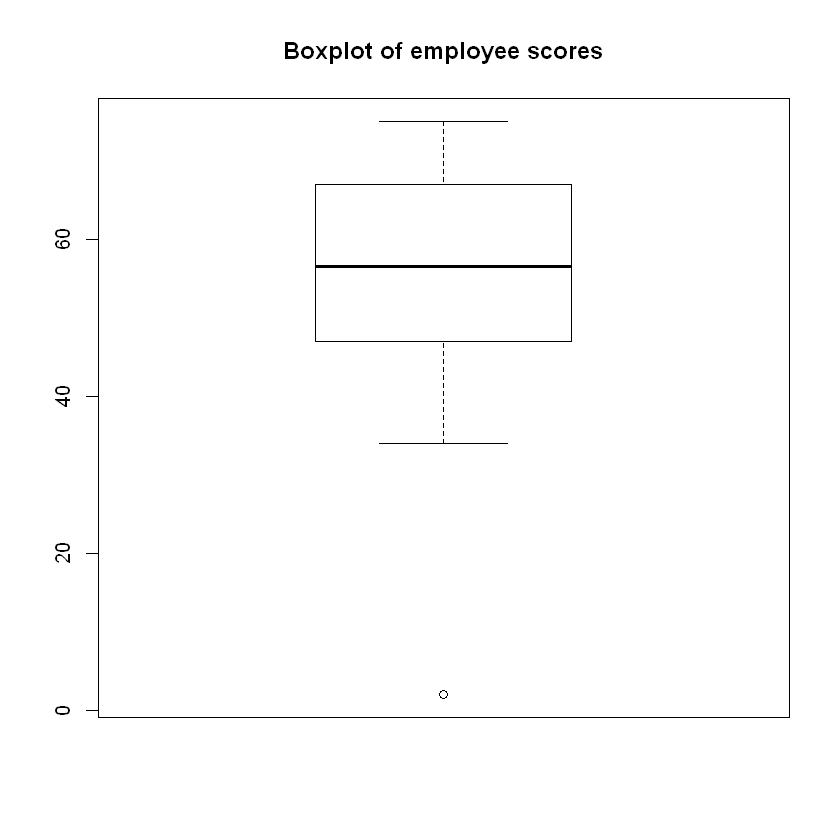

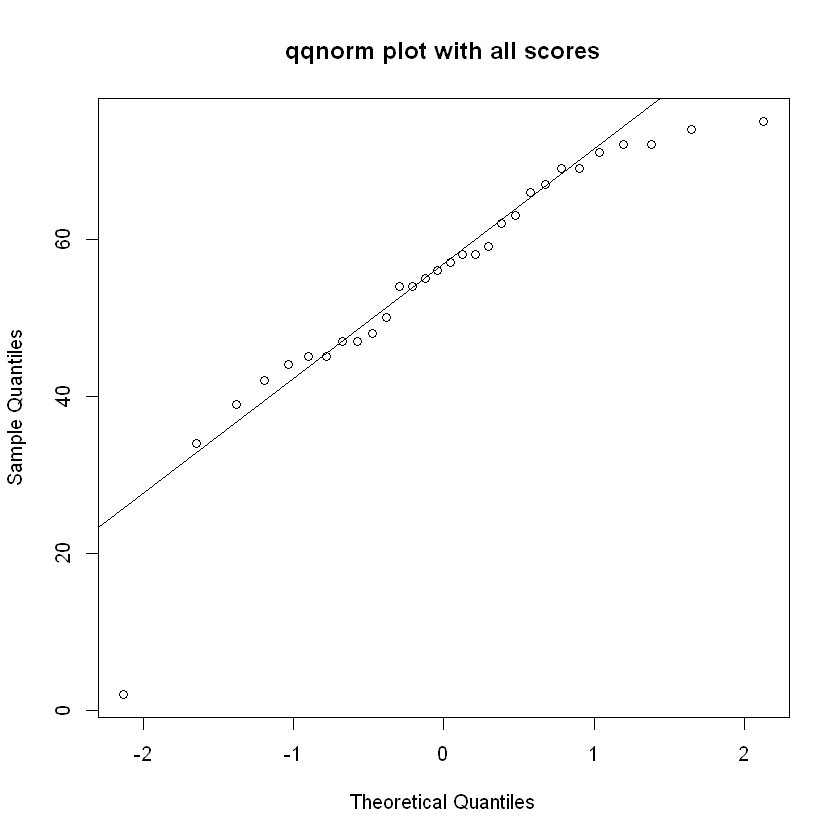


	Shapiro-Wilk normality test

data:  emp_scores
W = 0.89213, p-value = 0.00542



	Shapiro-Wilk normality test

data:  emp_scores[2:length(emp_scores)]
W = 0.96248, p-value = 0.3778


With outliers removed and a mean of 57.0 the z-score of the new employee scores is 0.607 while the critical 
value is 1.645 so the increase is not significant and we cannot reject the null hypothesis

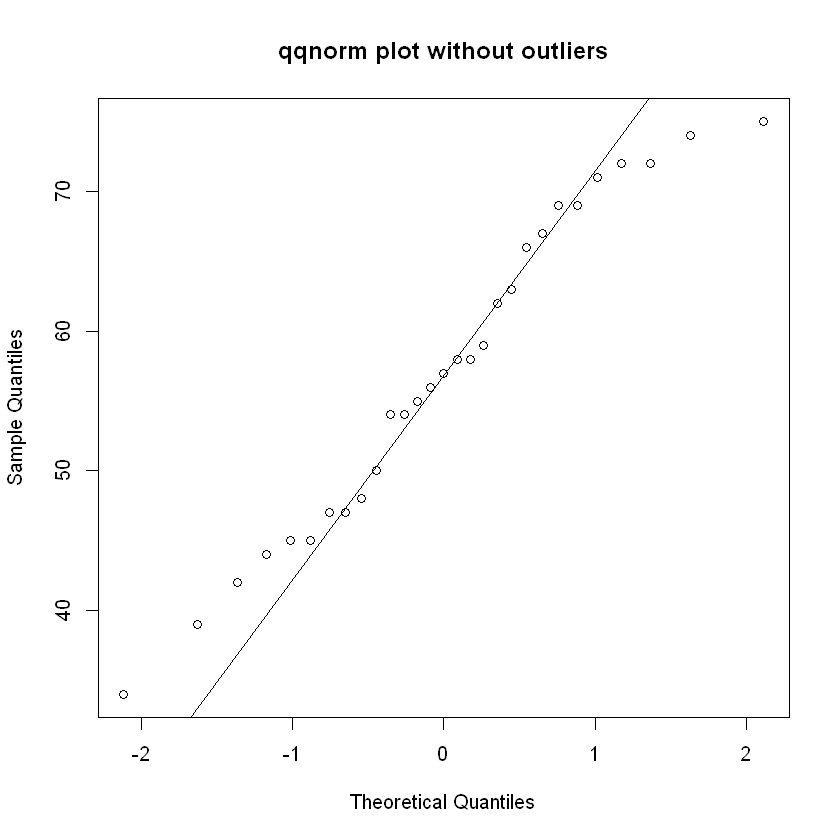

In [118]:
# defining variables
alpha = 0.05
nA = 30 
nat_avg = 50
emp_scores = c(02,54,69,47,66,44,56,55,67,47,58,39,42,45,72,72,69,75,57,54,34,62,50,58,48,63,74,45,71,59)
# null hypothesis - The average score of the employees is the same as the national average
# alternative hypothesis - The average score of the employees is greater than the national average
# test type - one-tailed z-test (we know the average score of the population) - assume equivarariance with national average
# ----------------- TESTING CODE ------------------
critical_valueA <- qnorm(1-alpha)
avg_emp = mean(emp_scores)
std_dev = sd(emp_scores)
z_emp = (avg_emp - nat_avg)/std_dev

if(z_emp<critical_valueA){
    cat(sprintf("At a mean of %0.1f the z-score of the new employee scores is %0.3f while the critical value is %0.3f so
the increase is not significant and we cannot reject the null hypothesis",avg_emp,z_emp,critical_valueA))
}

boxplot(emp_scores, main = 'Boxplot of employee scores')
qqnorm(emp_scores, main = "qqnorm plot with all scores")
qqline(emp_scores)

qqnorm(emp_scores[2:length(emp_scores)], main = "qqnorm plot without outliers")
qqline(emp_scores)

shapiro.test(emp_scores)
shapiro.test(emp_scores[2:length(emp_scores)])

avg_emp2 = mean(emp_scores[2:length(emp_scores)])
std_dev2 = sd(emp_scores[2:length(emp_scores)])
z_emp2 = (avg_emp2 - nat_avg)/std_dev2

if(z_emp2<critical_valueA){
    cat(sprintf("With outliers removed and a mean of %0.1f the z-score of the new employee scores is %0.3f while the critical 
value is %0.3f so the increase is not significant and we cannot reject the null hypothesis",avg_emp2,z_emp2,critical_valueA))
}

The z-score of the average employee scores was beneath that of the critical value, assuming equivariance between the group and the national average. Because we were testing for an increase in the test score the critical value was 1.645 and the z-score being below this indicated that we were unable to reject the null hypothesis that the average had not increased. 

Looking more closely at the employee scores revealed that the scores were not distributed normally (shapiro-wilk pvalue = 0.0054), invalidating the earlier test which required the assumption of approximate normality. While transforming the data via a log transformation and sqrt transformation did not result in an approximately normal distribution, removal of the outlier in the data (a score of 02) - which seemed reasonable given scoring a 02 would likely require effort to achieve that low - resulted in an approximately normal distribution (shapiro-wilk pvalue = 0.37). 

While removal of this outlier to meet the assumption of approximate normality resulted in a higher z-score (0.607) this was still lower than the critical value and thus we were still unable to reject the null hypothesis, so there was no statistically significant increase in score.

### B. 

A study looked at various cardiovascular risk factors in children, as measured at birth and during their first five years of life. One of the results for newborns were to study differences in bits per minute from two different races.
Based on the data, Is there evidence that the number of heart beats/min of newborn white children is fewer than that of newborn black children? 

The data is located in this working directory with the name Cardiovascular_children.csv

Normality testing the normal data:


	Shapiro-Wilk normality test

data:  children_b
W = 0.94962, p-value = 0.2458



	Shapiro-Wilk normality test

data:  children_w
W = 0.97178, p-value = 0.01208




Normality testing after log transformation:


	Shapiro-Wilk normality test

data:  log(children_b)
W = 0.94079, p-value = 0.1544



	Shapiro-Wilk normality test

data:  log(children_w)
W = 0.98551, p-value = 0.2236


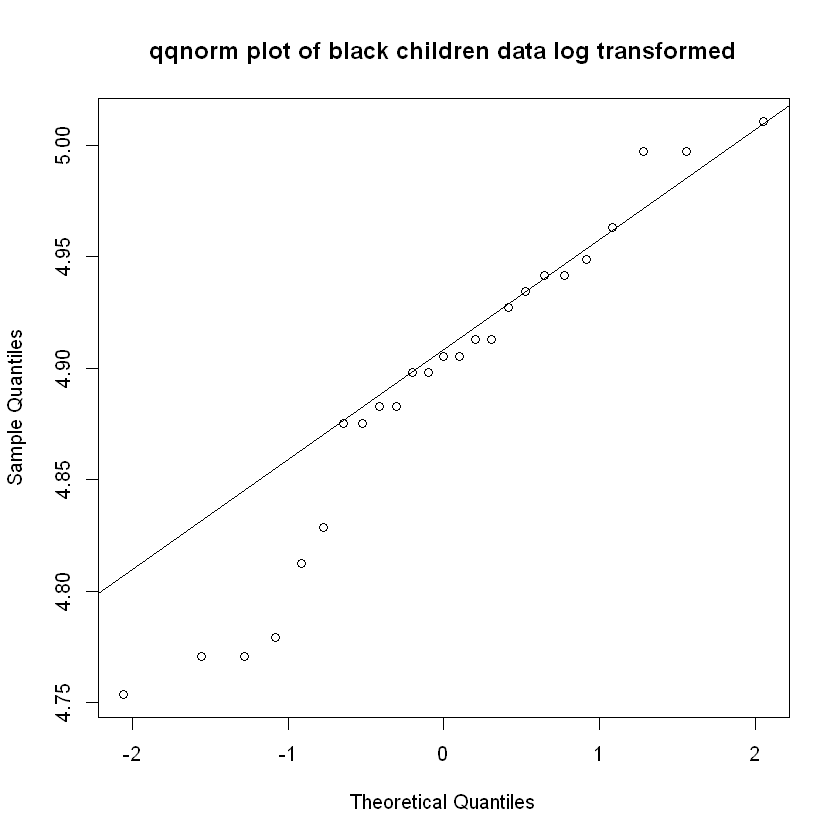


Testing for equivalent variance between groups:


	F test to compare two variances

data:  log(children_b) and log(children_w)
F = 0.69787, num df = 24, denom df = 120, p-value = 0.3092
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3965794 1.4026825
sample estimates:
ratio of variances 
         0.6978707 



Testing for difference in mean between groups:


	Two Sample t-test

data:  log(children_b) and log(children_w)
t = 5.3035, df = 144, p-value = 4.191e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.06181929 0.13527586
sample estimates:
mean of x mean of y 
 4.892952  4.794404 


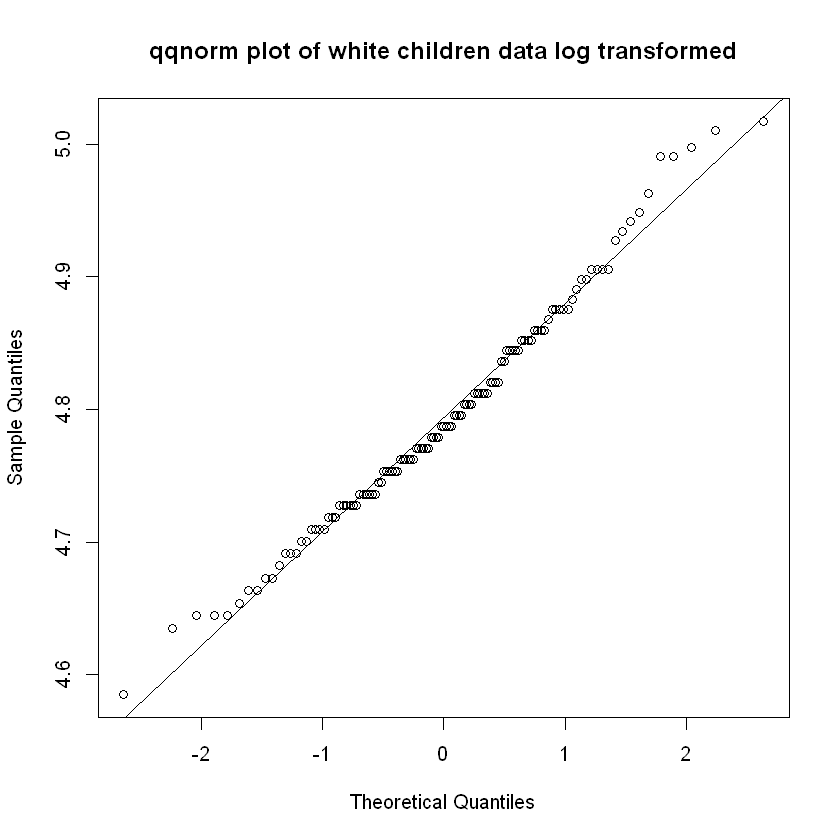

In [114]:
# defining variables
cv_children = data.frame(read.csv("Cardiovascular_children.csv"))
children_b = cv_children$race == "black"
children_b = cv_children$bpm[children_b]
children_w = cv_children$bpm[cv_children$race == "white"]
nB = length(children_b)
nW = length(children_w)
# Null Hypothesis - BPM is equivalent between babies of different races
# Alternative Hypothesis - BPM are different between babies of the different races

# testing the normality - qq plot and shapiro-wilk test
cat(sprintf("Normality testing the normal data:"))
shapiro.test(children_b)
shapiro.test(children_w)
cat(sprintf("\n\nNormality testing after log transformation:"))
shapiro.test(log(children_b))
shapiro.test(log(children_w))
qqnorm(log(children_b), main = "qqnorm plot of black children data log transformed")
qqline(log(children_b))
qqnorm(log(children_w), main = "qqnorm plot of white children data log transformed")
qqline(log(children_w))
# test to compare variance between groups to determine test type
cat(sprintf("\nTesting for equivalent variance between groups:"))
var.test(log(children_b),log(children_w),conf.level=0.95)

# test type - equal variance two tail t-test
cat(sprintf("\nTesting for difference in mean between groups:"))
t.test(log(children_b),log(children_w),var.equal=TRUE,paired=FALSE,conf.level=0.95)

Evalution of the data for normality revealed that in its original state only one of the two sets of data was approximately normal (by shapiro-wilk test). Log transformation of the data resulted in both sets of data being approximately normal according to the shapiro-wilk test, however, a significant deviation away from the norm on the qqnorm plot for black children was still seen on the lower end. This deviation is a sudden drop downwards followed by lateral movement and unlike skewed tails or curved ends, it does not seem to be affected by data transformations. It is suspected that the approximate normal designation from the shapiro-wilk test could be due to a relatively low n, however, we will proceed as if the log transformation truly results in two approximatley normal sets of data.

An F-test was used to test for equivariance between the datasets and a p-value of 0.309 indicated that the null hypothesis, that the variances were equivalent, was not rejected, allowing the use of a two tailed equivariance t-test. The t-test output a p-value of 4.1e-7, showing high levels of significance and the ability to reject the null hypothesis and provide confidence that the mean bpm of the two races is different, at 133bpm in black babies and 121bpm in white. 

### C. 

A 1980 study was conducted whose purpose was to compare the indoor air quality in offices where smoking was permitted vs offices where smoking was not permitted.  Measurements were made of carbon monoxide at 1:20 pm in both locations with the following results:

Does CO vary differently in the two types of working environments?


The data is located in this working directory with the name smoking.csv

Normality tests on original data:


	Shapiro-Wilk normality test

data:  air_CO$prohibited
W = 0.97106, p-value = 0.1571



	Shapiro-Wilk normality test

data:  permitted
W = 0.94105, p-value = 0.1565




Normality tests on sqrt transformed data:


	Shapiro-Wilk normality test

data:  sqrt(air_CO$prohibited)
W = 0.91275, p-value = 0.0003535



	Shapiro-Wilk normality test

data:  sqrt(permitted)
W = 0.98716, p-value = 0.9824


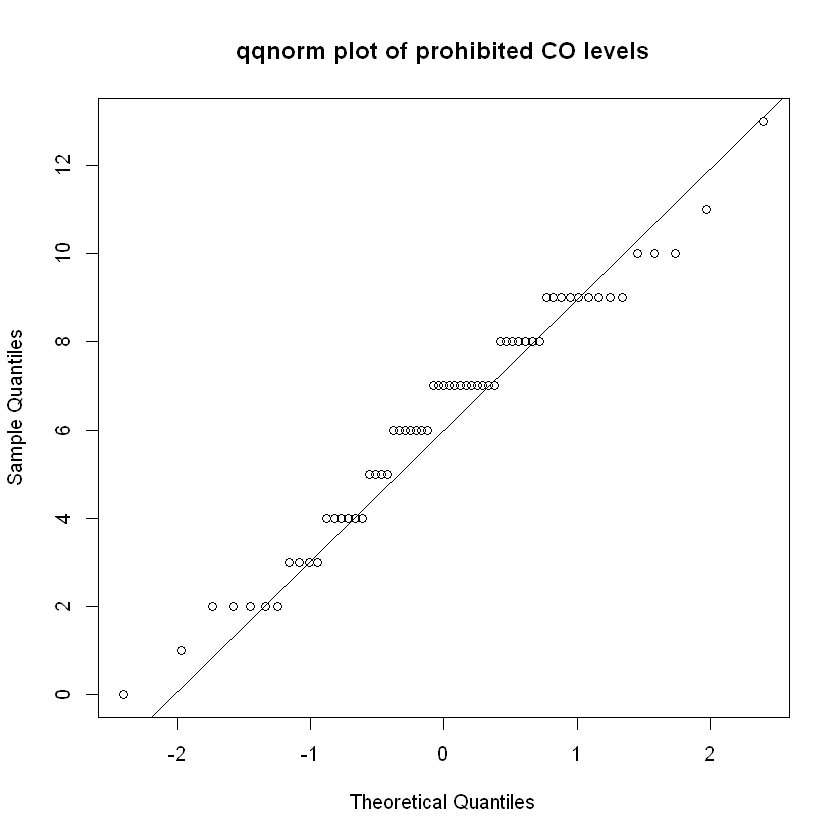


	F test to compare two variances

data:  air_CO$permitted and air_CO$prohibited
F = 8.1647, num df = 24, denom df = 60, p-value = 4.716e-11
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  4.338988 16.981451
sample estimates:
ratio of variances 
          8.164657 



	Welch Two Sample t-test

data:  air_CO$permitted and air_CO$prohibited
t = 2.7313, df = 26.443, p-value = 0.01109
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.077706 7.612130
sample estimates:
mean of x mean of y 
10.640000  6.295082 


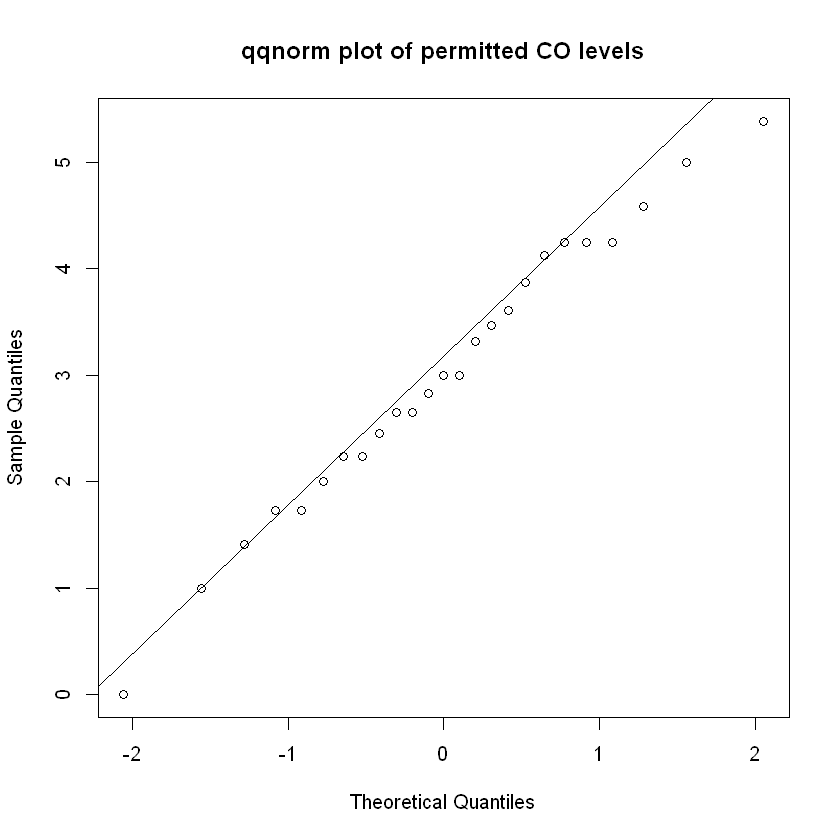

In [130]:
# defining variables
air_CO = read.csv("smoking.csv")
var_permitted = var(air_CO$permitted,na.rm = TRUE)
var_prohib = var(air_CO$prohibited)
permitted = air_CO$permitted[!is.na(air_CO$permitted)]
# Null Hypothesis - CO variance is equivalent between the working environments
# Alternative Hypothesis - CO variance is different between the working environments

# test for normality of the groups 
cat(sprintf("Normality tests on original data:"))
shapiro.test(air_CO$prohibited)
shapiro.test(permitted)
cat(sprintf("\n\nNormality tests on sqrt transformed data:"))
shapiro.test(sqrt(air_CO$prohibited))
shapiro.test(sqrt(permitted))
qqnorm(air_CO$prohibited,main = "qqnorm plot of prohibited CO levels")
qqline(air_CO$prohibited)
qqnorm(sqrt(permitted),main = "qqnorm plot of permitted CO levels")
qqline(sqrt(permitted))

# test type - two-tailed Fisher's F-test
var.test(air_CO$permitted,air_CO$prohibited,conf.level = 0.95, na.action = na.omit)
t.test(air_CO$permitted,air_CO$prohibited,var.equal = FALSE,paired = FALSE, na.action = na.omit,conf.level = 0.95)

Testing the two sets of data for normality revealed that both were approximately normal with shapiro-wilk p-values of 0.1571 and 0.1565 for prohibited and permitted locations, respectively. However, experimentation with data transformations to further normalize the data and align the data more favorably on the qqnorm plots revealed that while a sqrt transformation on the prohibited location data further increased non-normal behavior, it substantially increased the normality of the permitted locaiton data. Given that this transformation did not result in approximately normal distributions for both datasets, it was decided that they would be further evaluated in their original form.

An F-test was used to evaluate the change in CO variance between the two locations and output a p-value of 4.7e-11, indicating extreme significance in the rejection of the null hypothesis. Variance in permitted location data was found to be 8.16 fold higher than that of the prohibited data. Additional evaluetion showed a significant difference in mean CO level at 10.6 for permitted location and 6.3 for prohibited with a p-value of 0.011. 

### D. 

A study was conducted to investigate the effect of physical training on the serum cholesterol level.  Thirty subjects participated in the study.  Prior to training, blood samples were taken to determine the cholesterol level of each subject.  Then the subjects were put through a training program that centered on daily running and jogging.  At the end of the training period, blood samples were taken again and a second reading on the serum cholesterol level was obtained. Is there an effect of the training on cholesterol levels?

The data is located in this working directory with the name training.csv

Normality tests on original data:


	Shapiro-Wilk normality test

data:  pre_training
W = 0.93875, p-value = 0.08419



	Shapiro-Wilk normality test

data:  post_training
W = 0.93425, p-value = 0.06376


Normality tests on transformed data:


	Shapiro-Wilk normality test

data:  sqrt(pre_trainingS[2:length(pre_training)])
W = 0.94287, p-value = 0.1192



	Shapiro-Wilk normality test

data:  sqrt(post_trainingS[2:length(post_training)])
W = 0.94862, p-value = 0.1686


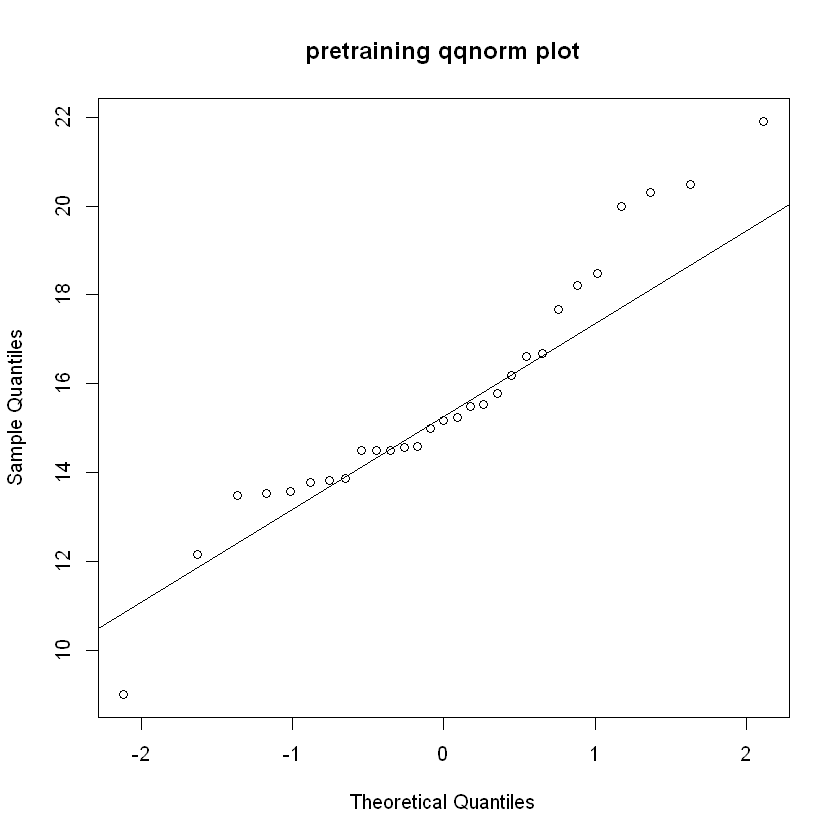


	F test to compare two variances

data:  sqrt(pre_trainingS[2:length(pre_training)]) and sqrt(post_trainingS[2:length(post_training)])
F = 2.6723, num df = 28, denom df = 28, p-value = 0.01145
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.254667 5.691893
sample estimates:
ratio of variances 
          2.672345 



	Paired t-test

data:  sqrt(pre_trainingS[2:length(pre_training)]) and sqrt(post_trainingS[2:length(post_training)])
t = 4.9308, df = 28, p-value = 3.351e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6747444 1.6337626
sample estimates:
mean of the differences 
               1.154253 


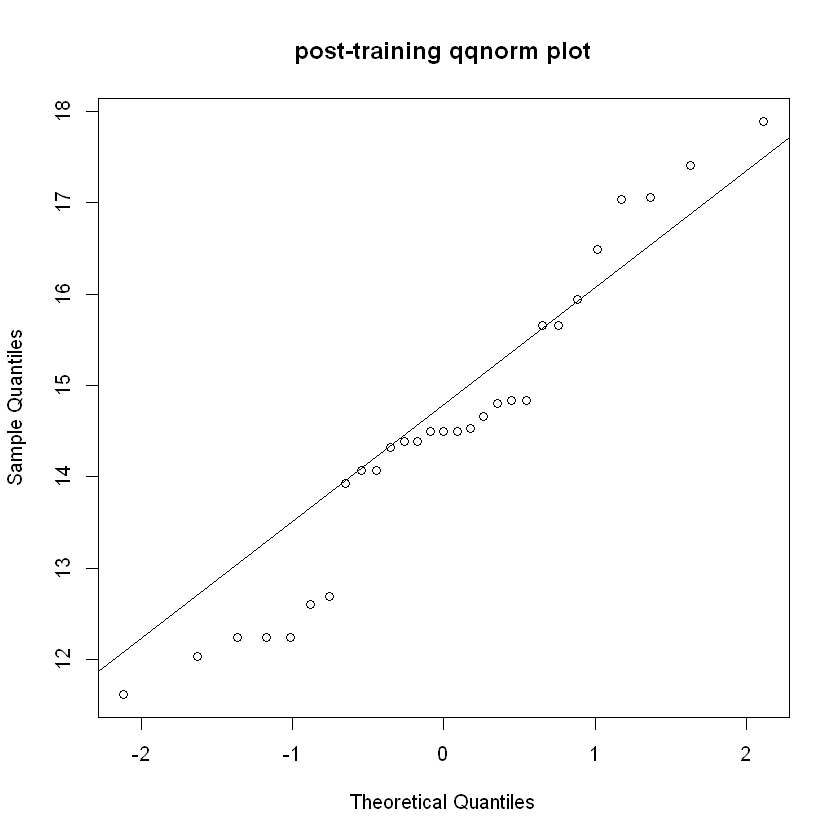

In [175]:
# defining variables
nD = 30
chol_levels = read.csv("training.csv")
pre_training = chol_levels$Pre.training.level.x..mg.Dl.
post_training = chol_levels$Post.training.level.x..mg.Dl.
pre_trainingS <- pre_training[order(pre_training)]
post_trainingS <- post_training[order(post_training)]
# Null Hypothesis - training had no effect on cholesterol
# Alternative Hypothesis - training had an effect on cholesterol levels
# testing normality of data
cat(sprintf("Normality tests on original data:"))
shapiro.test(pre_training)
shapiro.test(post_training)
cat(sprintf("Normality tests on transformed data:"))
shapiro.test(sqrt(pre_trainingS[2:length(pre_training)]))
shapiro.test(sqrt(post_trainingS[2:length(post_training)]))
qqnorm(sqrt(pre_trainingS[2:length(pre_training)]),main = "pretraining qqnorm plot")
qqline(sqrt(pre_trainingS[2:length(pre_training)]))
qqnorm(sqrt(post_trainingS[2:length(post_training)]),main = "post-training qqnorm plot")
qqline(sqrt(post_trainingS[2:length(post_training)]))

# f-test to determine type of t-test 
var.test(sqrt(pre_trainingS[2:length(pre_training)]),sqrt(post_trainingS[2:length(post_training)]),conf.level = 0.95)

# test type - two tail paired t-test
t.test(sqrt(pre_trainingS[2:length(pre_training)]),sqrt(post_trainingS[2:length(post_training)]),conf.level = 0.95,var.equal = FALSE,paired = TRUE)

Evaluation of the normality of these datasets revealed that both sets were nearing non-normal distributions with shapiro-wilk p-values of 0.08 and 0.06. Taking the square roots of these datasets in addition to removal of the most extreme outlier on the low end of both sets increased the normality and were used in the following evaluations (significance was unchanged though level of significance was altered). 

An F-test revealed that the datasets had unequal variances (0.01145) so an unequal variance paired two-tailed t-test was used. The pvalue of the t-test was 3.4e-5 indicating high significance and the ability to reject the null hypothesis, indicating that the average difference between the groups of ~40 was significant.

### E. 

Among females in the US between the ages of 18 and 74, diastolic blood pressure is normally distributed with mean 77 mm Hg and standard deviation of 11.6 mm Hg.  What is the probability that a randomly selected woman has a diastolic blood pressure less than 60 mm Hg?  greater than 90 mm Hg? between 60 and 90 mm Hg?

	X ~ N(77, 134.56)

In [180]:
# defining variables
meanE = 77
std_E = 11.6
# calculating probablities using normal distribution - z-score
z60 = (60-77)/11.6
z90 = (90-77)/11.6
p60 = pnorm(z60)
p90 = 1-pnorm(z90)
pbetween = 1 - (p60 + p90)
cat(sprintf("Given a normal distribution and known population mean and standard deviation we can use z-scores and pnorm to
calculate the probabilities of a certain set of values being found.\n Probabilty of dBP less than 60mmHg: %1.3f\n Probability of a dBP greater than 90mmHg: %1.3f\n The probability of these can be added together and used to find the probability of a 
 dBP between 60 and 90mmHg: %1.3f",p60,p90,pbetween))

Given a normal distribution and known population mean and standard deviation we can use z-scores and pnorm to
calculate the probabilities of a certain set of values being found.
 Probabilty of dBP less than 60mmHg: 0.071
 Probability of a dBP greater than 90mmHg: 0.131
 The probability of these can be added together and used to find the probability of a 
 dBP between 60 and 90mmHg: 0.797